# A8 - Ensemble Learning for Complex Regression Modeling on Bike Share Data

**Dataset**:

 Bike Sharing Demand Dataset (Hourly Data): Over 17,000 samples.
- Citation: Fanaee-T, Hadi, and Gamper, H. (2014). Bikeshare Data Set. UCI Machine Learning Repository.

# Part A: Data Preprocessing and Baseline

1. Data Loading and Feature Engineering
2. Train/Test Split
3. Baseline Model (Single Regressor)

In [10]:
# Loading the csv file
import pandas as pd

hour_data = pd.read_csv('dataset/hour.csv')
# hour_data.info()

# Dropping the unnecessary columns
hour_data = hour_data.drop(columns=['instant', 'dteday', 'casual', 'registered'])
# hour_data.info()

target = hour_data['cnt']
features = hour_data.drop(columns=['cnt'])

# One-hot encoding for categorical variables
features = pd.get_dummies(features, columns=['season', 'weathersit', 'mnth', 'hr'], drop_first=True)

# features.info()

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(f'Original dataset size: {features.shape}')
print(f'Training set size: {X_train.shape}, Testing set size: {X_test.shape}')

Original dataset size: (17379, 48)
Training set size: (13903, 48), Testing set size: (3476, 48)


## Baseline Model (Single Regressor)

In [11]:
# Training Decision Tree Regressor with max_depth=6
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

# Training Linear Regression Model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

## Baseline Models Results and Comparison

In [17]:
# Evaluating both the models using RMSE and R² Score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Decision Tree Regressor
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

## Simple plot for comparison

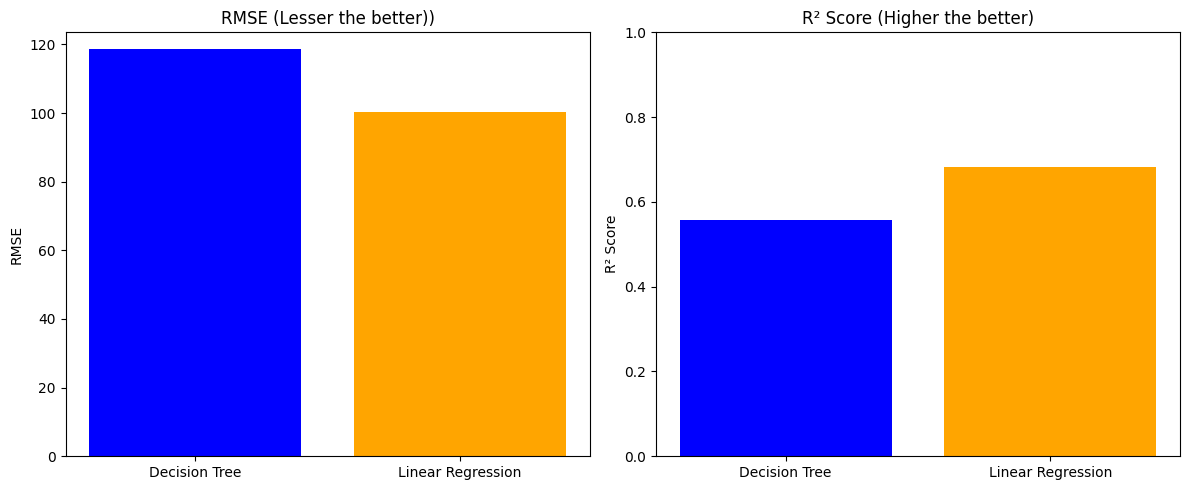

Baseline models evaluation:
 - RMSE: Linear Regression model gives lesser RMSE = 100.44 and higher R² = 0.6814 compared to Decision Tree Regressor with RMSE = 118.53 and R² = 0.5563.
Linear Rgresssion model is chosen as the baseline model for further ensemble learning techniques.


In [20]:
# Simple plot for comparison
import matplotlib.pyplot as plt

# Data for plotting
models = ['Decision Tree', 'Linear Regression']
rmse_values = [rmse_dt, rmse_lr]
r2_values = [r2_dt, r2_lr]

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# RMSE Plot
ax[0].bar(models, rmse_values, color=['blue', 'orange'])
ax[0].set_title('RMSE (Lesser the better))')
ax[0].set_ylabel('RMSE')
ax[0].set_ylim(0, max(rmse_values) + 5)

# R² Score Plot
ax[1].bar(models, r2_values, color=['blue', 'orange'])
ax[1].set_title('R² Score (Higher the better)')
ax[1].set_ylabel('R² Score')
ax[1].set_ylim(0, 1)

# Show plot
plt.tight_layout()
plt.show()

print(f"Baseline models evaluation:\n - RMSE: Linear Regression model gives lesser RMSE = {rmse_lr:.2f} and higher R² = {r2_lr:.4f} compared to Decision Tree Regressor with RMSE = {rmse_dt:.2f} and R² = {r2_dt:.4f}.")
print("Linear Rgresssion model is chosen as the baseline model for further ensemble learning techniques.")